<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 4 - Funciones de transformación básica

### 4. Funciones de transformación básica
<ul>
<li>Operaciones binarias</li>
<li>Transformaciones geométricas</li>
</ul>

# 4. Transformaciones u operaciones aritméticas binarias (con dos imágenes)

Las operaciones aritméticas entre imágenes son operaciones se llevan a cabo entre pares de pixeles correspondientes. Las cuatro operaciones básicas son:

C(x, y) = A(x,y) + B(x,y)

C(x, y) = A (x,y) - B(x,y)

C(x, y) = A (x,y) * B(x,y)

C(x, y) = A (x,y) / B(x,y)


## Suma 

Podemos realizar una suma simple de dos imágenes (sin que una de ellas tenga que ser una máscara), aunque resultando en saturación...

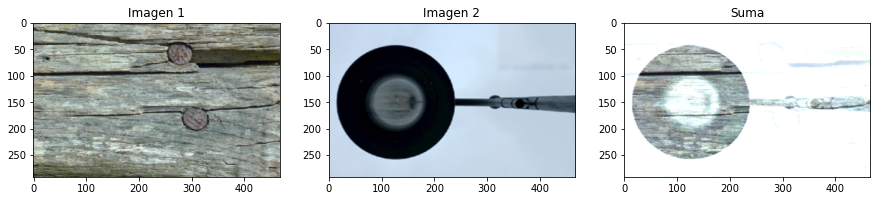

In [56]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes, hacerlas del mismo tamaño para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/m3/example_4.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Operación suma de las dos imágenes
res = cv2.add(img1,img2)

#Crear una figura 1x3 para plotear las imágenes de entrada y la obtenida al sumarlas
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");


La operación suma tiene más sentido como una combinación ponderada de dos imágenes...

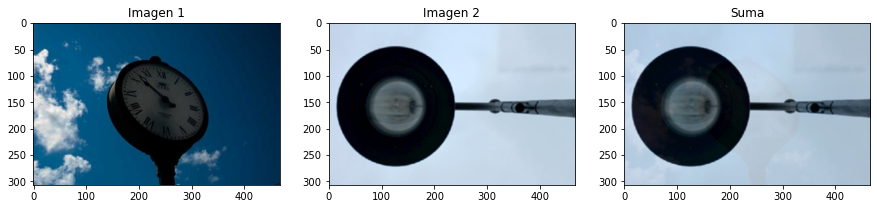

In [59]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes, hacerlas del mismo tamaño para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Indicamos el parámetro a que indica la importancia de cada imagen
a = 0.1

#Mediante la T.Lineal, si a=1, tenemos la imagen 1 únicamente. Si a=0, obtenemos solo img2.
# Si 0<a<1 tendremos combinaciones ponderadas de las imágenes entrada
res = cv2.add(img1*a,img2*(1-a)).astype(np.uint8)

#Crear una figura 1x3 para mostrar las imágenes de entrada y la combinación ponderada
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma");


## Aplicaciones de la suma

El operador suma puede ser utilizado para sobreponerle a un objeto los bordes obtenidos por algún método de detección de bordes.



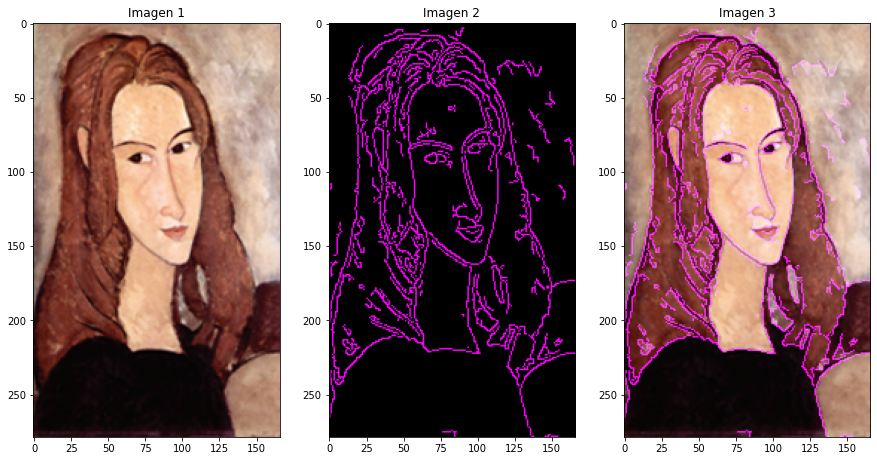

In [6]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer la imagen de entrada
img1 =cv2.cvtColor(cv2.imread('res/aritm/portrait.png'), cv2.COLOR_BGR2RGB)

#Utilizamos la función cv2.Canny, que corresponde a un algoritmo de detección de bordes
edges = cv2.Canny(img1,100,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral
edges[edges<128] = 0   
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

edges[:,:,1]=0               #para obtener el color magenta (255,0,255)

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposición
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");



También podemos utilizar la suma para promediar imágenes del mismo fenómeno que tengan ruido aleatorio y mejorar la calidad...

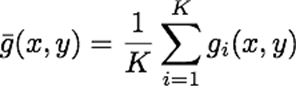

<img src="res/aritm/promedio.png">

Ejemplo interactivo: https://www.olympus-lifescience.com/en/microscope-resource/primer/java/digitalimaging/processing/imageaveraging/

C:\Users\esteb\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\esteb\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


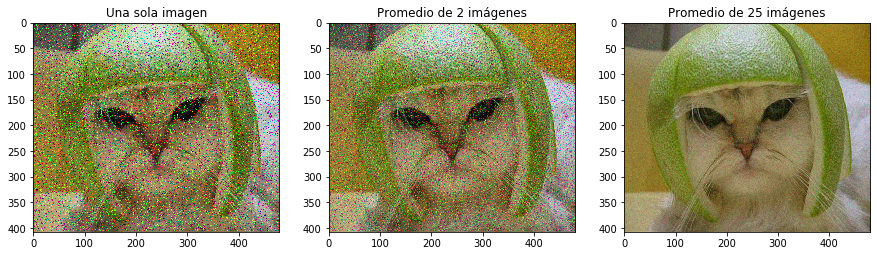

In [4]:
import numpy as np
import os
import cv2

#Definir la función ruido, cuyo parámetro es una imagen de entrada
def noisy(image):
    #Obtener los vectores fila, columna y el canal
    row,col,ch = image.shape
    #Dar valor a los parámetros 
    s_vs_p = 0.5
    amount = 0.1
    #Generar una copia de la imagen de entrada
    out = np.copy(image)
  
    # Salt mode

    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    #La imagen evaluada en el vector coords se satura
    out[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    #La imagen en el vector coords se satura en color negro
    out[coords] = 0
    return out

#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/aritm/cat.jpg'), cv2.COLOR_BGR2RGB)


#Generar una lista, para guardar el promedio de 25 imágenes
noisy_images = []
for i in range(25):
    #Añadir a la lista las imágenes promediadas ruidosas
    noisy_images.append(noisy(img))


#Crear una matriz de ceros del mismo tamaño que img entrada    
averaged_2 = np.zeros(img.shape, np.float32)
#Se promedian las primeras dos imágenes ruidosas
for i in range(2):
    averaged_2 += noisy_images[i]
averaged_2 = (averaged_2/2).astype(np.uint8)
    

#Crear una matriz de ceros del mismo tamaño de img entrada    
averaged_25 = np.zeros(img.shape, np.float32)

#Se promedian las primeras 25 imágenes ruidosas guardadas en la lista noisy_images
for i in range(25):
    averaged_25 += noisy_images[i]
averaged_25 = (averaged_25/25).astype(np.uint8)

#Crear una figura 1x3 y mostrar los promedios de una, dos y 25 imágenes
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(noisy_images[0],cmap='gray')
plt.title("Una sola imagen")

plt.subplot(1,3,2)
plt.imshow(averaged_2,cmap='gray')
plt.title("Promedio de 2 imágenes")

plt.subplot(1,3,3)
plt.imshow(averaged_25,cmap='gray')
plt.title("Promedio de 25 imágenes");


## Resta

Podemos utilizar la operación de resta sin necesidad de ponderar...

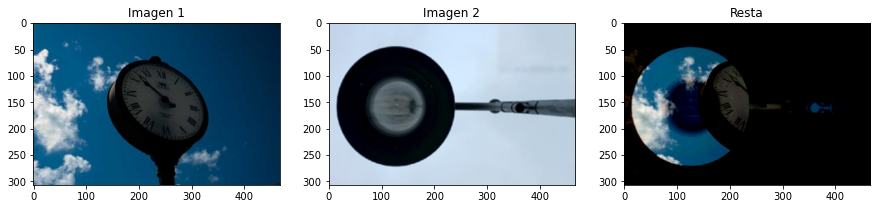

In [8]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes de entrada y asegurarse que tengan el mismo tamaño
img1 = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/m3/example_3.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Realizar la operación resta y darle el tipo de dato uint8
res = cv2.subtract(img1,img2).astype(np.uint8)

#Generar una figura 1x3 y mostrar imágenes de entrada y la resta de las mismas
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");
   

## Aplicaciones de la resta

La resta de imágenes tiene uno de sus mayores usos en la segmentación para eliminar (o corregir) el background de una escena. Para estos casos es conveniente añadir una compensación a modo de evitar que nuestros valores se acerquen demasiado a 0 y perdamos información.


Text(0.5, 1.0, 'Resta')

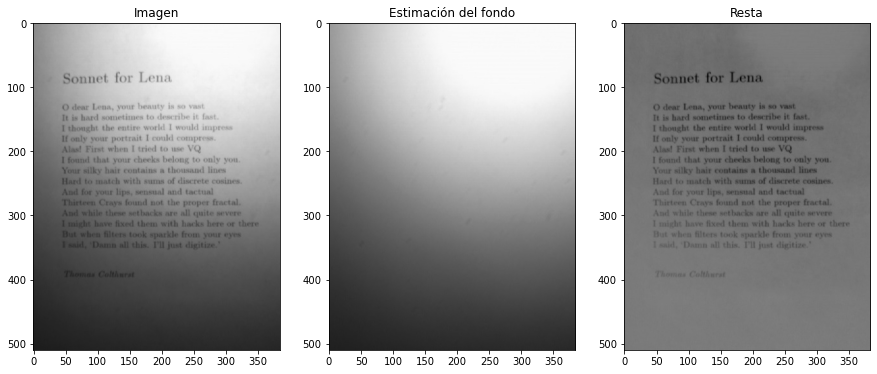

In [65]:

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de imágenes de entrada
img1 = cv2.cvtColor(cv2.imread('res/aritm/son1.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/son2.jpg'), cv2.COLOR_BGR2RGB)

#Conversión de imágenes al mismo tipo de dato, uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Sumarle a cada posición de img1 125, como ahora es tipo uint16, no hay pérdida de información
img1 += 125

#Realiza la resta
res = img1 - img2

#Resta las 125 unidades de img1 que inicialmente sumamos
img1 -= 125

#Regresa al tipo de dato uint8, entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#La resta debe por tanto, ser también tipo de dato uint8
res=res.astype(np.uint8)

#Genera una figura 1x3 para realizar la muestra de imágenes, fondo y resta.
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Estimación del fondo")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

Otra aplicación de la resta es en la detección de movimiento entre dos imágenes, útil en la compresión de video y en el seguimiento de objetos.

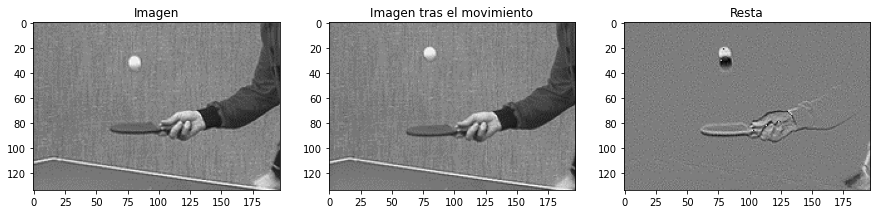

In [66]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de las dos imágenes
img1 = cv2.cvtColor(cv2.imread('res/aritm/raqueta1.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/raqueta2.png'), cv2.COLOR_BGR2RGB)

#Conversión a tipo de dato uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 125 unidades a img1, hace la resta de imágenes y los extraemos de nuevo
img2 += 125
res = img2 - img1
img2 -= 125

#Regresa al tipo de dato uint8 entre 0 y 255
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Genera una figura 1x3 para mostrar la imagen, una estimacion de fondo y la resta
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen tras el movimiento")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

La resta de imágenes también se usa mucho en medicina...

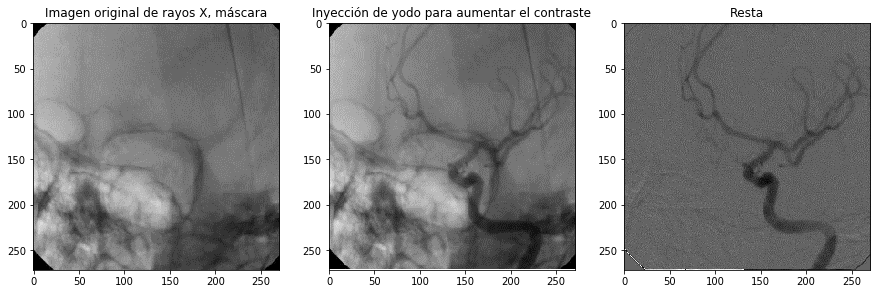

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de las imágenes entrada
img2 = cv2.cvtColor(cv2.imread('res/aritm/venas1.png'), cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(cv2.imread('res/aritm/venas2.png'), cv2.COLOR_BGR2RGB)

#Conversión a uint16
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)

#Suma 100 unidades a img1, hace la resta y extrae la misma cantidad de unidades
img1 += 100
res = img1 - img2
img1 -= 100

#Volver a uint8
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
res=res.astype(np.uint8)

#Generar figura 1x3 para mostrar la máscara, la inyección de yodo y la resta de imágenes
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img2,cmap='gray')
plt.title("Imagen original de rayos X, máscara")

plt.subplot(1,3,2)
plt.imshow(img1,cmap='gray')
plt.title("Inyección de yodo para aumentar el contraste")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Resta");

La suma y la resta pueden combinarse para llevar a cabo seguimiento de objetos como se ve a continuación:

<img src="res/aritm/movement.png">


## Multiplicación

La multiplicación de imágenes puede ser usada para extraer regiones de interés usando una mascara (aunque esto se hace con operaciones booleanas).


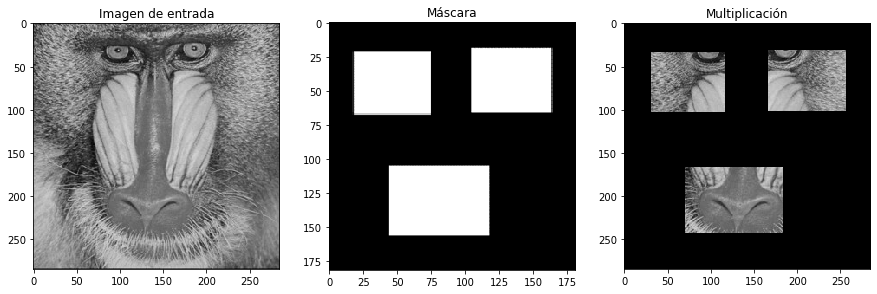

In [15]:
#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/aritm/face.jpg'), cv2.COLOR_BGR2RGB)

#Leer la máscara y normalizarla, cambiar su tipo de dato y ajustar su tamaño
mascara = cv2.imread('res/aritm/mask.png')/255
show_mask = cv2.imread('res/aritm/mask.png')/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operación multiplicar
out = cv2.multiply(img, mascara)

#Figura 1x3 para mostrar imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(img, cmap='gray')
ax2.imshow(show_mask, cmap='gray')
ax3.imshow(out, cmap='gray')

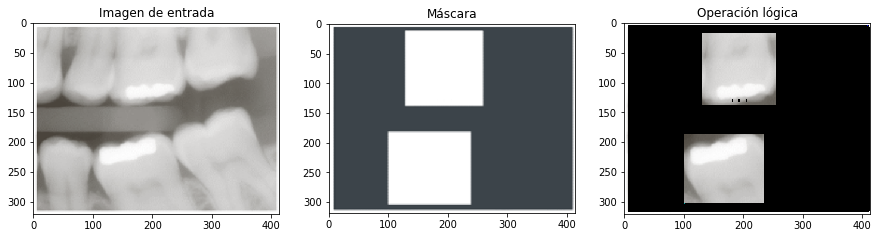

In [17]:
#Lectura de imagen
img = cv2.cvtColor(cv2.imread('res/aritm/dientes.png'), cv2.COLOR_BGR2RGB)

#Leer la máscara, normalizarla
mascara = cv2.imread('res/aritm/mask2.png')/255
show_mask = cv2.imread('res/aritm/mask2.png')
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))
mascara = mascara.astype(np.uint8)

#Operación multiplicación
out = cv2.multiply(img, mascara)

#Figura 1x3 que muestra la imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(img, cmap='gray')
ax2.imshow(show_mask, cmap='gray')
ax3.imshow(out, cmap='gray')

## División

La división puede ser utilizada para detectar movimiento de manera similar a la resta. Hay que considerar, sin embargo, que será necesario escalar la imagen para poder visualizarla.

Text(0.5, 1.0, 'División')

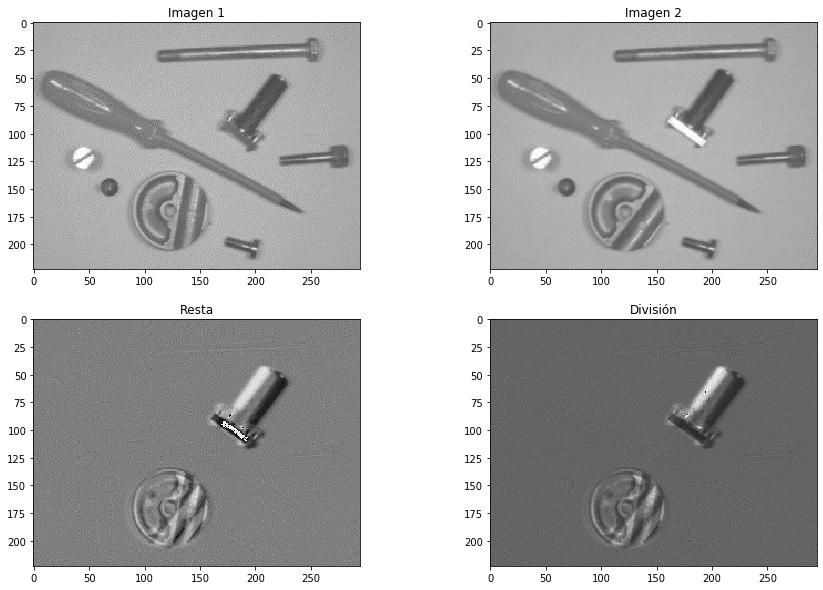

In [18]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de imágenes de entrada, se ponen del mismo tamaño para poder operarlas
img1 = cv2.cvtColor(cv2.imread('res/aritm/herr.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/aritm/herr2.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


#RESTA
img1 = img1.astype(np.uint16)
img2 = img2.astype(np.uint16)
img1 += 125
res = img1 - img2
res = res.astype(np.uint8)
img1 -= 125
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)

#DIVISION

#Es importante convertir los datos a flotante si se dispone a dividir
img1_div = img1.astype(np.float32)
img2_div = img2.astype(np.float32)
div = cv2.divide(img1_div,img2_div)
div = div * 100
div = div.astype(np.uint8)

#Crear figura 2x2 para mostrar las imágenes de entrada con sus operaciones respectivas
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(2,2,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(2,2,3)
plt.imshow(res,cmap='gray')
plt.title("Resta")

plt.subplot(2,2,4)
plt.imshow(div,cmap='gray')
plt.title("División")


## 5. Transformaciones Geométricas
<ul>
<li>Las Transformaciones Geométricas mantienen el valor de los píxeles, sin embargo, modifican la relación espacial entre ellos.</li>
<li>Para realizar una transformación geométrica se deben realizar dos pasos:</li>
    <ul>
      <li>Definir el mapeo espacial de coordenadas entre la imagen de origen y la imagen de salida (rotación, escala, traslación, ...)</li>
  <li>Aplicar un algoritmo de interpolación para definir el valor de los píxeles que por la transformación han quedado sin valor.</li>
  </ul>
</ul>
<br>
<center><i>Figura. Transformaciones geometricas.</i></center>
<img src="res/m3/transformacion_geometrica.png" alt="operaciones" style="height:500px"></img>
<br><br>
### Transformación afin
<br>
Las transformaciones afines son un grupo de transformaciones geométricas que preservan ciertas propiedades de las imágenes. Un primer caso de este tipo de transformación consiste en la familia de transformaciones geométricas básicas resultantes de rotaciones, escalamientos y traslaciones.
<br>
<center><i>Figura. Transformación afin.</i></center>
<img src="res/m3/transformacion_afin.png" alt="operaciones" style="height:300px"></img>
<br>
### Traslación
<br>
La Traslación  es un mapeo en el que cada píxel de la imagen de entrada es movido a una nueva posición en la imagen de salida:
<br>
<center><i>Figura. Traslacion.</i></center>
<img src="res/m3/traslacion.png" alt="operaciones" style="height:300px"></img>
<br>
Una aplicación especial de la Traslación es la reflexión de la imagen: 
<br>
<center><i>Figura. Traslacion - reflexion.</i></center>
<img src="res/m3/traslacion_2.png" alt="operaciones" style="height:300px"></img>
<br>

# Implementemos una traslación rudimentaria.

[[  1   0 100]
 [  0   1 100]
 [  0   0   1]]


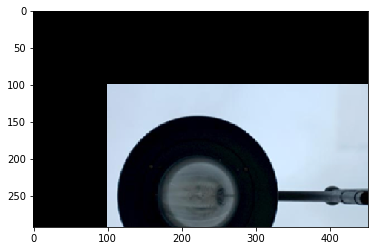

In [19]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Se dan valores para translación en x e y
tx = 100
ty = 100

#Generar la matriz de traslación
matriz_traslacion = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
print(matriz_traslacion)

#Leer la imagen y obtener su tamaño
I = cv2.cvtColor(cv2.imread("res/m3/example_3.png"),cv2.COLOR_BGR2RGB)
I_size = np.shape(I)
#Generar una matriz de ceros del mismo tamaño y tipo de datos que I
G = np.zeros(I_size, np.uint8)

#Recorrer todas las componentes i,j de I
for i in range(I_size[0]):
    for j in range(I_size[1]):
        #Realiza la multiplicación de matrices entre la matriz translación y
        #una matriz generada por la iteración
        w = np.matmul( matriz_traslacion, np.array([[i],[j],[1]]))
        #wx y wy son números pertenecientes a la primera y segunda componente de w
        wx = w[0]
        wy = w[1]
        #Condicional doble para filtrar los valores de la translación
        if(wx >= 0 and wx < I_size[0]):
            if(wy >= 0 and wy < I_size[1]):
                G[wx, wy] = I[i, j]
            
plt.imshow(G, cmap="gray")
            

<hr>

### Analicemos en clase

<ul>
<li>¿Por que se pierde información en la traslación? ¿Cómo podemos solucionar esto?</li>

</ul>
<hr>

# Utilicemos OpenCv para realizar la traslación

OpenCV recibe una matriz de transformación afin con la siguiente forma (se omite la tercera fila):

<img src="res/afin.png">


Text(0.5, 1.0, 'Imagen Salida')

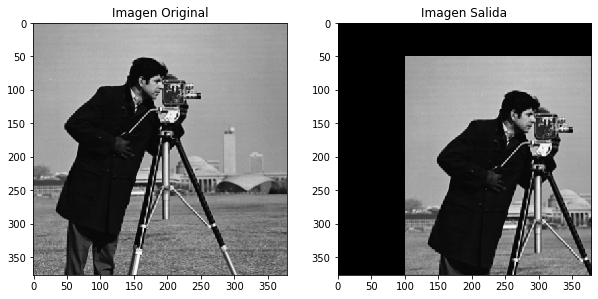

In [24]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Se obtienen los vectores filas, columnas
filas,columnas = img.shape
#Se asignan valores a tx y ty, se construye la matriz M de translación
tx = 100
ty = 50
matriz_afin = np.float32([[1,0,tx],
                          [0,1,ty]])

#Transformación de la imagen con base en la matriz M, usando warpAffine
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))# , flags=cv2.INTER_CUBIC)

#Figura 1x2 para mostrar la entrada y la salida
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")



# Reflexión

La reflexión es un caso especial de la traslación, en la que se manipulan los índices correspondientes a la diagonal principal en la matriz afin.

Al reflejar una imagen, invertimos la posición de todos los elementos de la misma. Sin embargo, esto significa que los valores de intensidad quedan por fuera del espacio matricial original, por lo que se realiza una traslación del número de columnas o filas para devolver la imagen al recuadro.

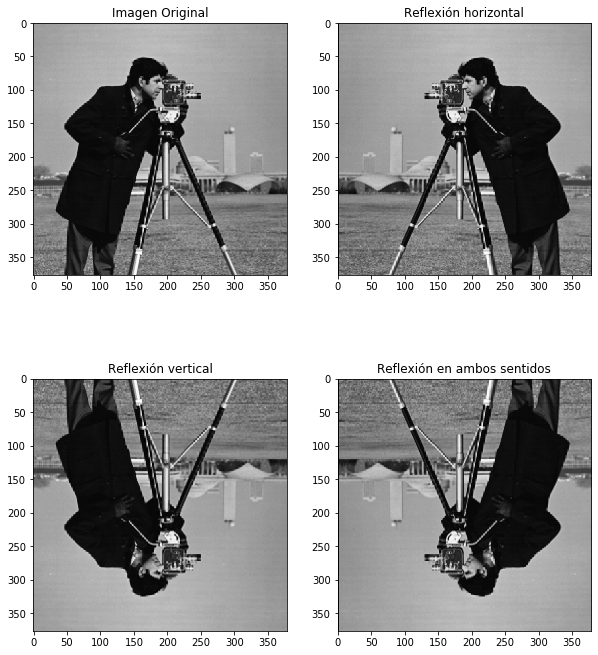

In [21]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(img,matriz_afin_ref_x,(columnas,filas))

#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

#Generar la matriz de reflexión simultánea en X & Y
matriz_afin_ref_xy = np.float32([[-1,0,columnas]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación X & Y a la imagen
ref_xy = cv2.warpAffine(img,matriz_afin_ref_xy,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal")

plt.subplot(2,2,3)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical")

plt.subplot(2,2,4)
plt.imshow(ref_xy,cmap='gray')
plt.title("Reflexión en ambos sentidos");


<hr>
# Rotación
<br>
La Rotación es un mapeo en que se produce un cambio de orientación de la imagen.
<br>
<center><i>Figura. Rotacion.</i></center>
<img src="res/m3/rotacion.png" alt="operaciones" style="height:300px"></img>
<br>
Donde El punto $(x_0, y_0)$ son las coordenadas del centro de rotación y $\theta$ el ángulo de rotación.
<br>

<center><i>Figura. Rotacion - Ejemplos.</i></center>
<img src="res/m3/rotacion_2.png" alt="operaciones" style="height:200px"></img>
<br>
Un caso especial que se debe considerar es si la imagen de salida debe cambiar para cubrir toda la imagen de entrada
<br>

<center><i>Figura. Rotación - cambio de tamaño de la imagen de salida.</i></center>
<img src="res/m3/rotacion_3.png" alt="operaciones" style="height:300px"></img>
<br>
La operacion de rotación obligatoriamente implica realizar un proceso de interpolación para corregir casos de coordenadas que no coinciden con posiciones exactas de pixeles en la imagen.
<hr>


OpenCV facilita la función getRotationMatrix2D, la cual nos permite calcular la matriz de transformación afin para cualquier rotación dado un ángulo en grados y el centro de rotación.


[[ 6.123234e-17  1.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17  3.780000e+02]]


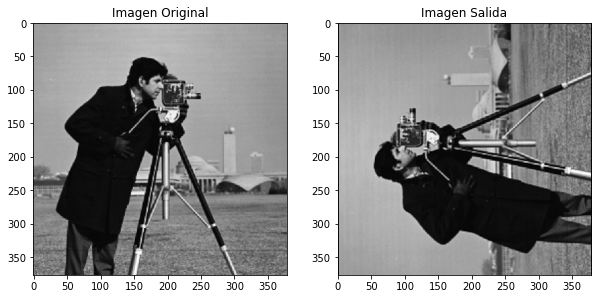

In [69]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen de entrada
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Asignar un ángulo de rotación
theta = 90

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Salida");


### Inclinación
<br>
La Inclinación transforma una región rectangular en un rombo. Sirve para “simular” una perspectiva. La inclinación se puede dar en el eje X, en e Y o en ambos:
<br>
<center><i>Figura. Ejemplos de inclinacion. El valor de inclinación es la tangente del ángulo.</i></center>
<img src="res/m3/inclinacion.png" alt="operaciones" style="height:300px"></img>
<br>
<ul>
    <li>La Inclinación sobre X en una cantidad $I_x$: $R(x,y) = 𝐴(𝑥−I_x∗y, y)$</li>
    <li>La Inclinación sobre Y en una cantidad $I_y$: $R(x,y) = 𝐴(x, y - I_y*x)$</li>
    <li>La Inclinación sobre X y Y en sus respectivas cantidades: $R(x,y) = A(−I_x∗y, y - I_y*x)$</li>
</ul>
<br>
<center><i>Figura. Matriz afin para la inclinacion.</i></center>
<img src="res/m3/inclinacion_2.png" alt="operaciones" style="height:300px"></img>
<br>
<center><i>Figura. Ejemplos de valores de inclinacion.</i></center>
<img src="res/m3/inclinacion_3.png" alt="operaciones" style="height:200px"></img>
<hr>

Text(0.5, 1.0, 'Imagen Salida')

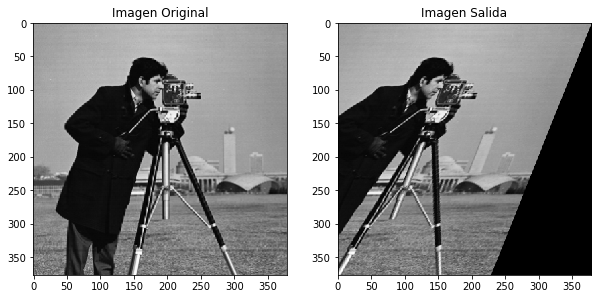

In [26]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
 
#Lectura de imagen de entrada y obtención de filas y columnas
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
filas,columnas = img.shape

#Con base en la teoría, crear la matriz M de inclinación
#reemplazando los valores b y d
inc_x = -0.4
inc_y = 0.0
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

<hr>

### Escala
<br>
La Escala permite cambiar el tamaño de las imágenes:
<br>
<center><i>Figura. Escala.</i></center>
<img src="res/m3/escala.png" alt="operaciones" style="height:300px"></img>
<br>
El grado de calidad de una transformacion de escala, radica en completar la informacion faltante de forma tal que se mantenga la apariencia visual de la imagen original.
<br>
<center><i>Figura. Escala - Interpolacion.</i></center>
<img src="res/m3/escala_2.png" alt="operaciones" style="height:400px"></img>
<hr>

La Interpolación puede considerarse como el cálculo del valor de intensidad de un píxel, en una posición cualquiera, como una función de los píxeles que la rodean.
<br><br>
Existen diferentes tipos de interpolación:
<ul>
    <li>Vecino más cercano</li>
    <li>Lineal</li>
    <li>Bilineal</li>
    <li>Bicúbica</li>
    <li>Supermuestreo</li>
</ul>
<br>
La <b>Interpolación del vecino más cercano</b>: $B(x,y) = A(\left \lfloor \frac{x}{10}  \right \rfloor , \left \lfloor \frac{y}{10}  \right \rfloor)$, donde 10 es el factor de escala.
<br>
<b>Ventajas</b>:
<ul>
    <li>Es muy sencilla y rápida de calcular.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>El efecto de cuadriculado es evidente, y da lugar imágenes de poca calidad</li>
    <li>A medida que el factor de escala aumenta, la imagen se hace más y más borrosa</li>
</ul>
<br>
<hr>
La <b>Interpolación Lineal</b> promedia los dos vecinos más cercanos para encontrar el valor del píxel.
<br><br>
<b>Ventajas</b>:
<ul>
    <li>Es muy rápida de calcular y mejora un poco los resultados con respecto a la interpolación por vecino más cercano.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>Da lugar imágenes de poca calidad</li>
</ul>
<br>
<hr>
La Interpolación Bilineal es una mejora de la anterior, promediando en este caso 4 pixeles adyacentes. Sin embargo, los factores de ponderación vienen dados por la distancia de los 4 píxeles se que usaran para la interpolación
<br>
<b>Ventajas</b>:
<ul>
    <li>Mejora los resultados de la interpolación haciendo los cambios más suaves.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>Es más costosa computacionalmente.</li>
</ul>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_2.png" alt="interpolacion bilineal" style="height:200px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_3.png" alt="interpolacion bilineal" style="height:120px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_4.png" alt="interpolacion bilineal" style="height:90px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_5.png" alt="interpolacion bilineal" style="height:90px"></img>
<br>
<center><i>Figura. Interpolacion bilineal.</i></center>
<img src="res/m3/interpolacion_6.png" alt="interpolacion bilineal" style="height:70px"></img>
<hr>

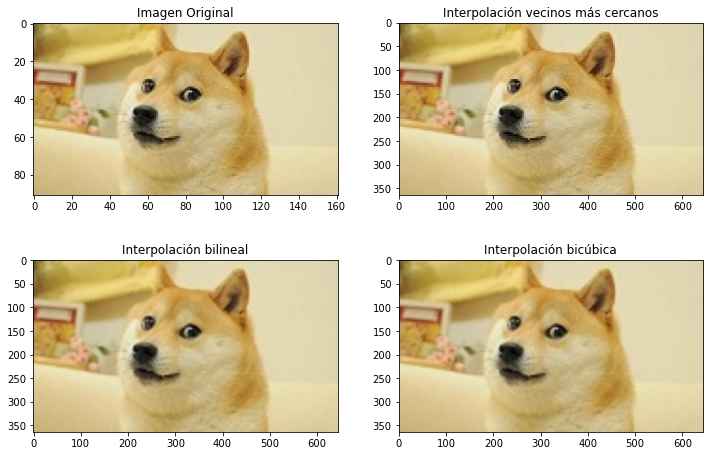

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Leer la imagen de entrada a color y convertirla RGB
img=cv2.imread('res/m3/doge.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Acercar la imagen de entrada con base en una aproximación de vecinos cercanos
#o interpolación bilinear/bicúbica
nearest = cv2.resize(img,(img.shape[1]*4, img.shape[0]*4), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_LINEAR)
bicubic = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

#Generar figura 2x2 para mostrar y contrastar las aproximaciones con la imagen original
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(nearest,cmap='gray')
plt.title("Interpolación vecinos más cercanos")

plt.subplot(2,2,3)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bilineal")

plt.subplot(2,2,4)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bicúbica")

#Guardar las imágenes en la carpeta del notebook
nearest = cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB)
bilinear = cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB)
bicubic = cv2.cvtColor(bicubic, cv2.COLOR_BGR2RGB)


cv2.imwrite("nearest.jpg", nearest);
cv2.imwrite("bilinear.jpg", bilinear);
cv2.imwrite("bicubic.jpg", bicubic);
